In [39]:
!pip install shap;
import shap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer, load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sns

In [40]:
def boxplots(X,y, columns):
  data = pd.concat([pd.DataFrame(y, columns=['target']), pd.DataFrame(X, columns=columns)], axis=1)

  num_features = X.shape[1]
  num_rows = num_features // 3 + 1

  fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
  fig.subplots_adjust(hspace=0.5)

  # Se recorre cada feature para generar su diagrama de caja respecto de la salida
  for i, feature in enumerate(data.columns[1:]):
      row = i // 3
      col = i % 3
      sns.boxplot(x='target', y=feature, data=data, ax=axes[row, col])
      axes[row, col].set_title(f'Diagrama de caja de {feature}')
      axes[row, col].set_xlabel('Target')
      axes[row, col].set_ylabel(feature)

  # Eliminar subplots vacíos si es necesario
  if num_features % 3 != 0:
      for i in range(num_features % 3, 3):
          fig.delaxes(axes[num_rows - 1, i])

  plt.show()


In [41]:
data=load_wine()
df=pd.DataFrame(np.c_[data['data'], data['target']],
                  columns= np.append(data['feature_names'], ['target']))

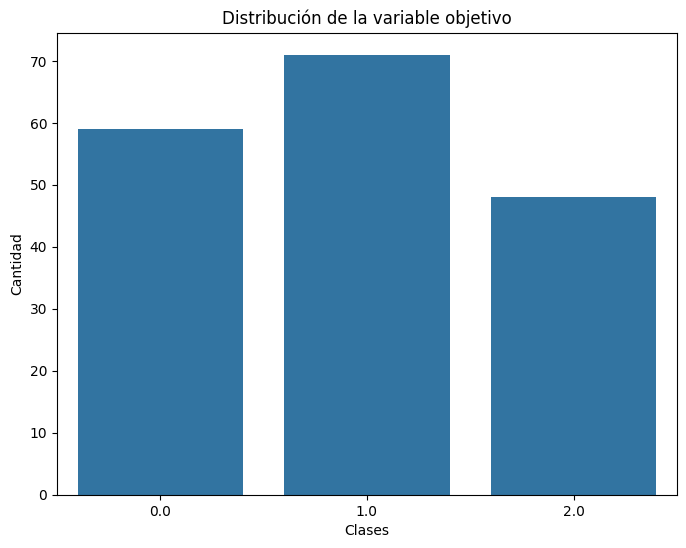

In [42]:
# Visualización del balanceo de la variable objetivo
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df)
plt.title('Distribución de la variable objetivo')
plt.xlabel('Clases')
plt.ylabel('Cantidad')
plt.show()

In [43]:
df=df[df.target!=1]
df['target']=df['target'].replace(2, 1)

<ipython-input-43-7af7dc32478b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target']=df['target'].replace(2, 1)


In [44]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [45]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,13.479626,2.604206,2.447290,19.001869,103.186916,2.319159,1.995047,0.360654,1.564766,6.366262,0.891869,2.496449,897.775701,0.448598
std,0.573348,1.105115,0.208438,3.255387,11.190571,0.675408,1.155059,0.125347,0.553097,2.019544,0.221718,0.803295,302.746931,0.499691
min,12.200000,1.240000,2.040000,11.200000,80.000000,0.980000,0.340000,0.170000,0.550000,3.520000,0.480000,1.270000,415.000000,0.000000
25%,13.060000,1.725000,2.300000,16.750000,95.000000,1.680000,0.725000,0.265000,1.140000,4.960000,0.690000,1.700000,645.000000,0.000000
50%,13.500000,2.050000,2.410000,19.000000,102.000000,2.450000,2.430000,0.320000,1.540000,5.700000,0.910000,2.730000,845.000000,0.000000
75%,13.865000,3.410000,2.610000,21.000000,111.500000,2.850000,2.995000,0.460000,1.970000,7.550000,1.075000,3.200000,1112.500000,1.000000
max,14.830000,5.650000,3.220000,27.000000,132.000000,3.880000,3.930000,0.630000,2.960000,13.000000,1.280000,4.000000,1680.000000,1.000000


In [46]:
df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [47]:
len(df[df.target==1]), len(df[df.target==0])

(48, 59)

In [48]:
feature_names=df.drop('target',axis=1).columns.values
feature_names

array(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'], dtype=object)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1),
                                                    df['target'].values.reshape(-1,1),
                                                    test_size=0.2,
                                                    random_state=42)

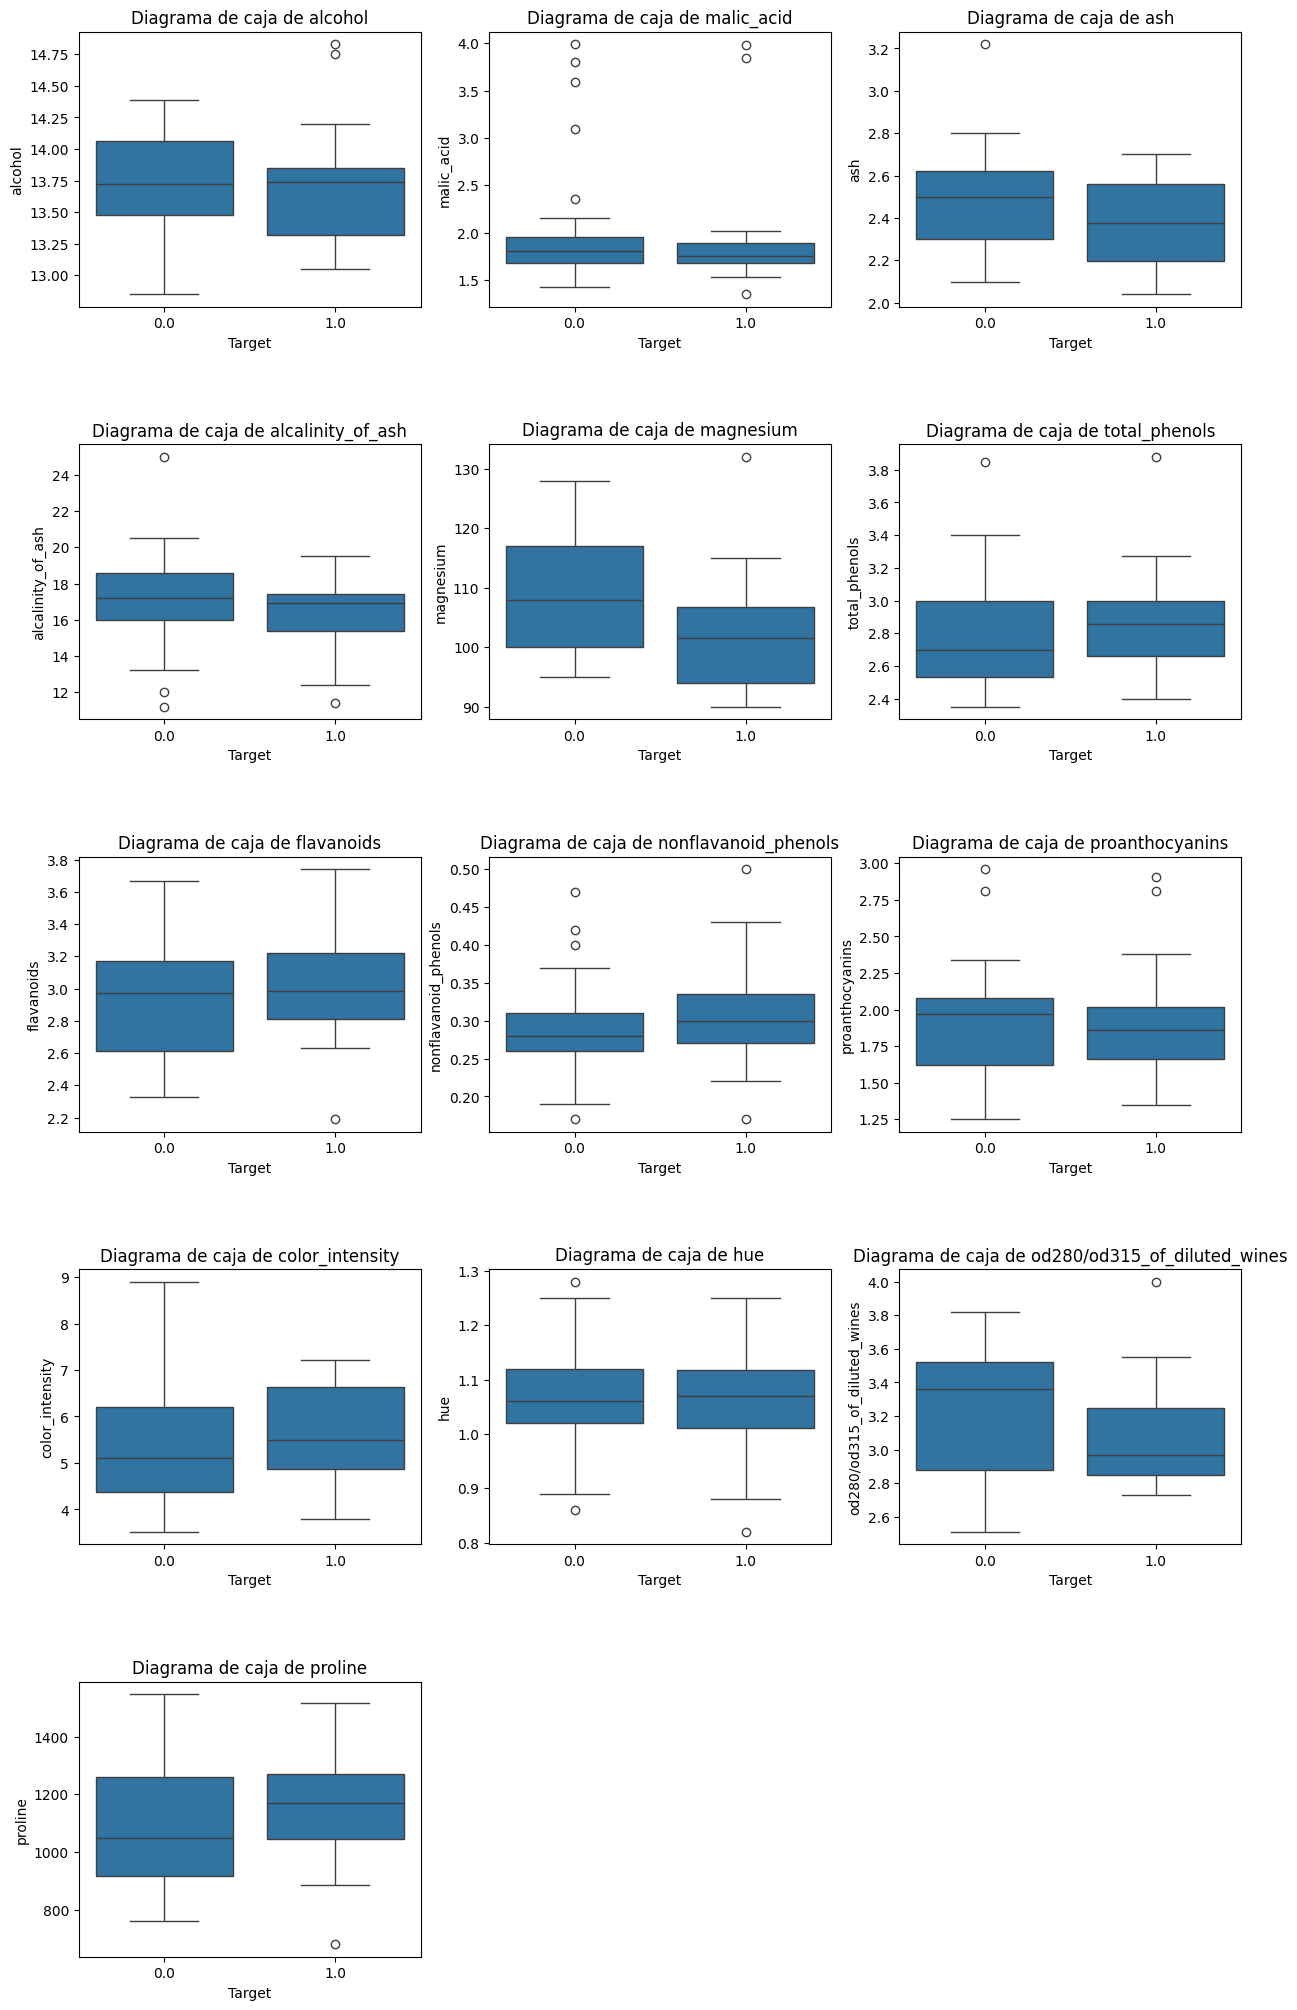

In [50]:
boxplots(X_train, y_train, feature_names)

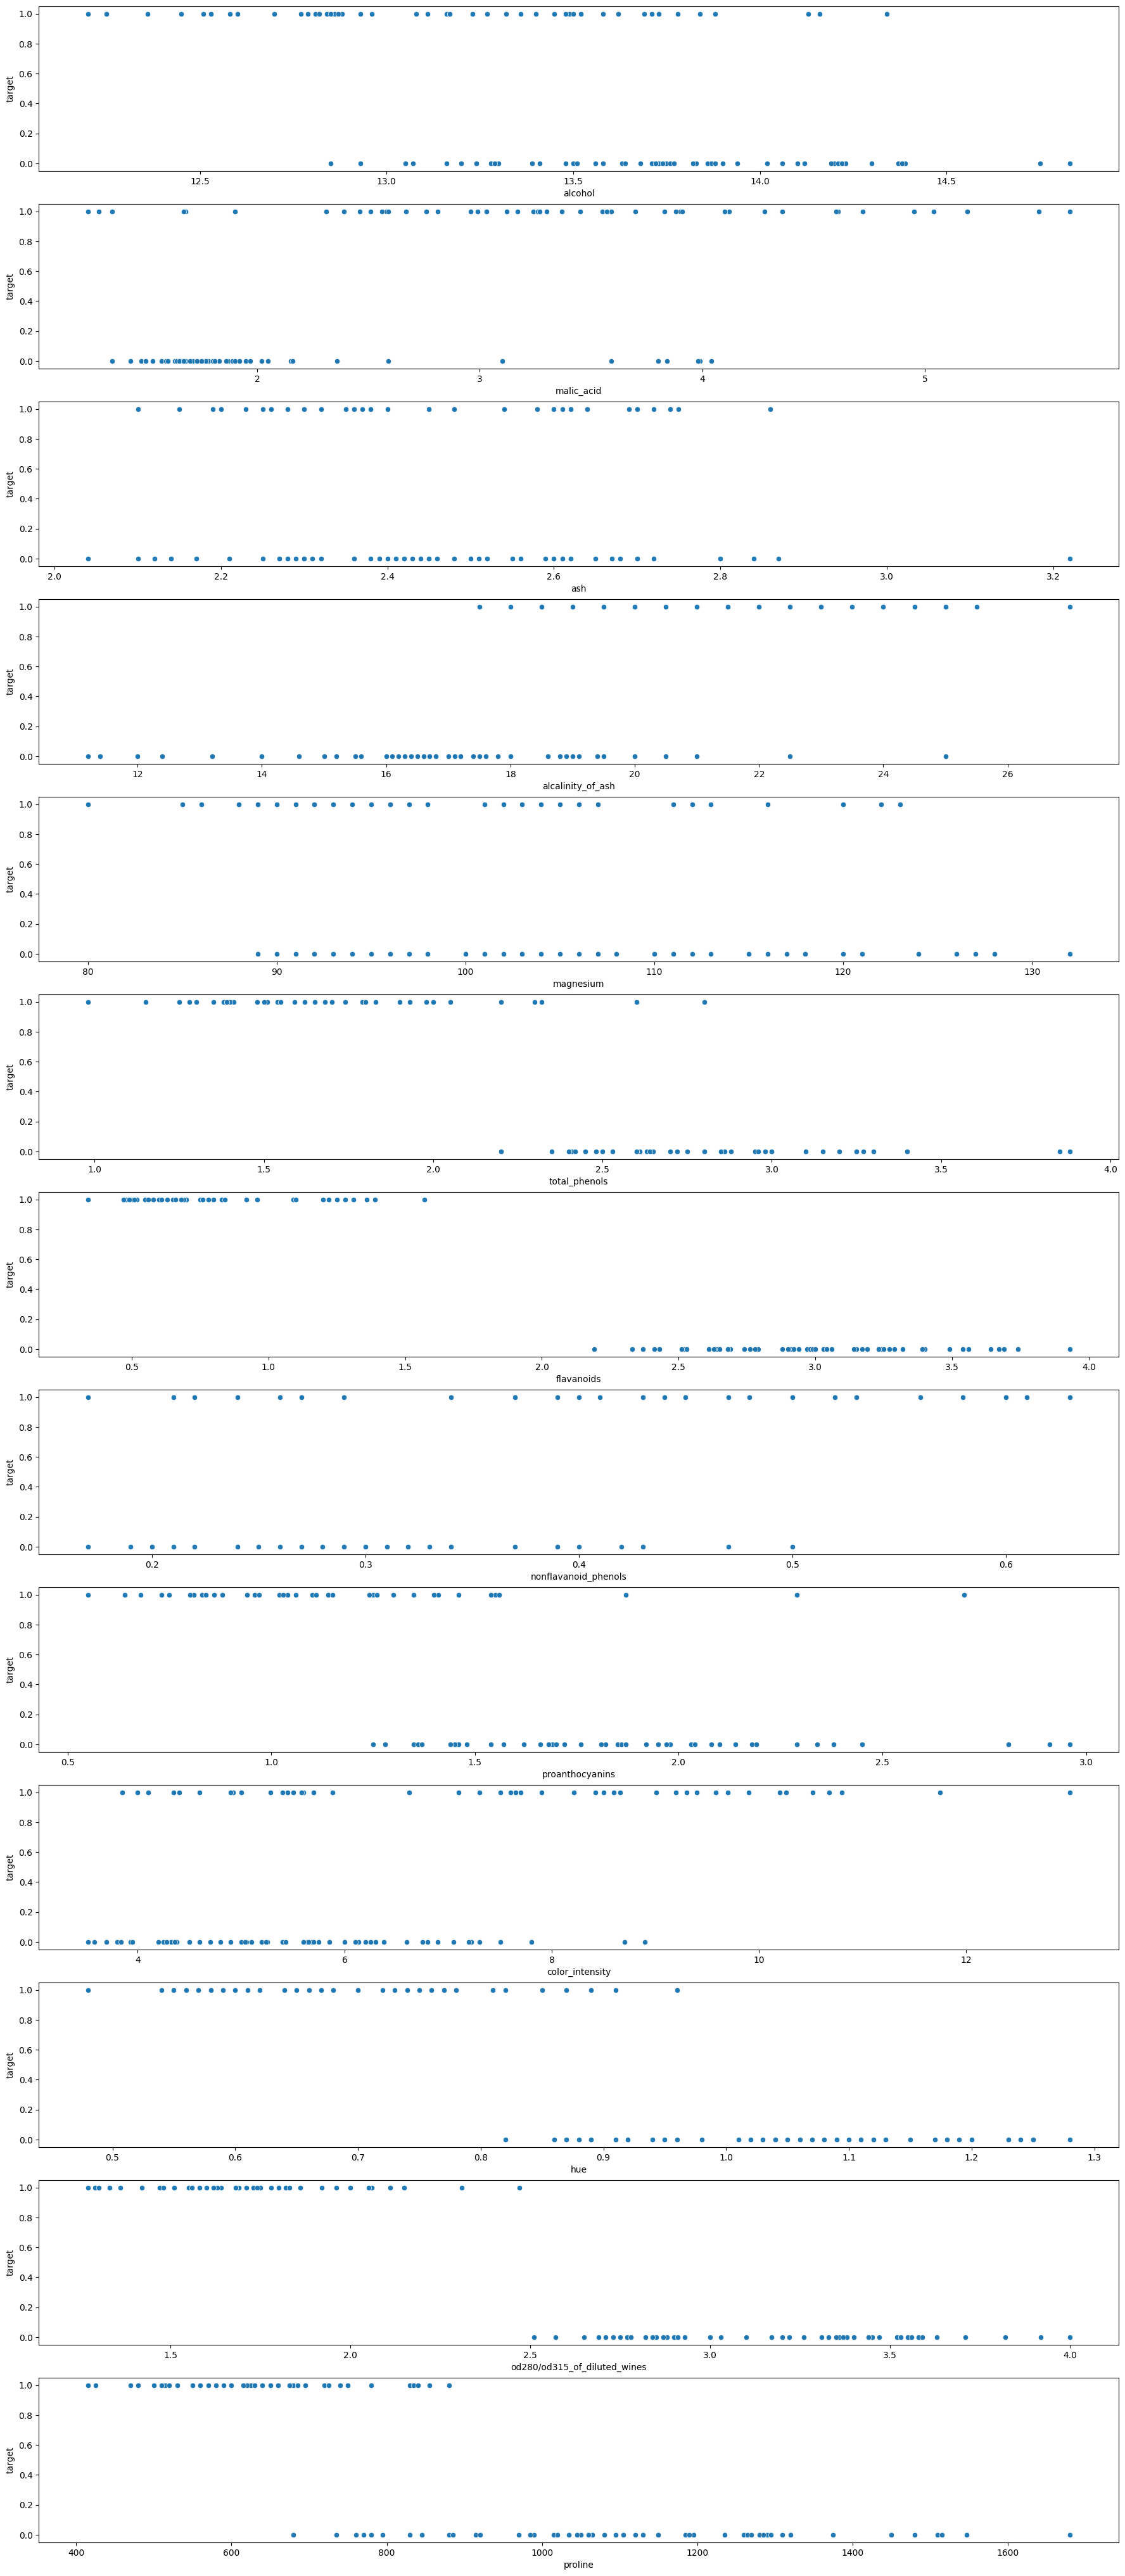

In [51]:
fig, ax = plt.subplots(len(feature_names),1,figsize=(22,4*len(feature_names)))
for i in range(len(feature_names)):
  sns.scatterplot(data=df, x=feature_names[i], y='target', ax=ax[i])
  ax[i].set_xlabel(feature_names[i])

In [52]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [53]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train.reshape(len(y_train),))

LogisticRegression()

In [54]:
y_pred = model.predict(X_test_scaled)
y_ajuste_train = model.predict(X_train_scaled)

print('Métricas en el entrenamiento')
print(classification_report(y_train, y_ajuste_train))
print(confusion_matrix(y_train, y_ajuste_train))

print('Métricas en el conjunto de prueba')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Métricas en el entrenamiento
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        47
         1.0       1.00      1.00      1.00        38

    accuracy                           1.00        85
   macro avg       1.00      1.00      1.00        85
weighted avg       1.00      1.00      1.00        85

[[47  0]
 [ 0 38]]
Métricas en el conjunto de prueba
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       1.00      1.00      1.00        10

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22

[[12  0]
 [ 0 10]]


In [55]:
df_coeficientes=pd.DataFrame(model.coef_.T, index=feature_names)

In [56]:
df_coeficientes

,0
alcohol,-0.187311
malic_acid,0.194328
ash,-0.012707
alcalinity_of_ash,0.474175
magnesium,-0.076153
total_phenols,-0.700098
flavanoids,-0.920262
nonflavanoid_phenols,0.443725
proanthocyanins,-0.515801
color_intensity,0.526579


<Axes: >

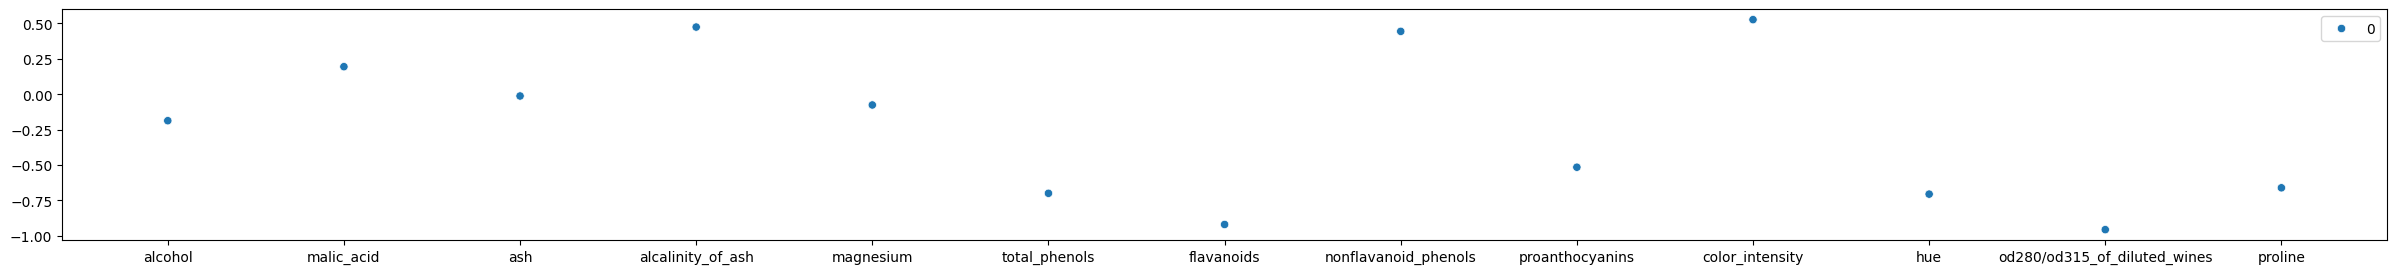

In [57]:
import seaborn as sns
fig, ax=plt.subplots(1,1,figsize=(30,3))
sns.scatterplot(data=df_coeficientes, ax=ax)

# **Explicabilidad SHAP**

In [58]:
# Crea un objeto explainer SHAP
explainer = shap.LinearExplainer(model, X_train_scaled, feature_names=feature_names)

In [59]:
# Calcula los valores SHAP para un conjunto de ejemplos de prueba
shap_values = explainer.shap_values(X_test_scaled)

In [60]:
shap_values.shape

(22, 13)

## Interpretabilidad **local**

In [63]:
index=0

In [64]:
model.predict_proba(X_test_scaled)[index]

array([0.00253407, 0.99746593])

In [65]:
model.predict(X_test_scaled)[index]

1.0

In [66]:
shap_values[index]

array([ 0.20364374,  0.37496458, -0.00225244,  0.37426505,  0.12047789,
        0.67639529,  1.08957312,  0.3793516 ,  0.67302603,  0.31646336,
        1.15578199,  0.77260153,  0.60804211])

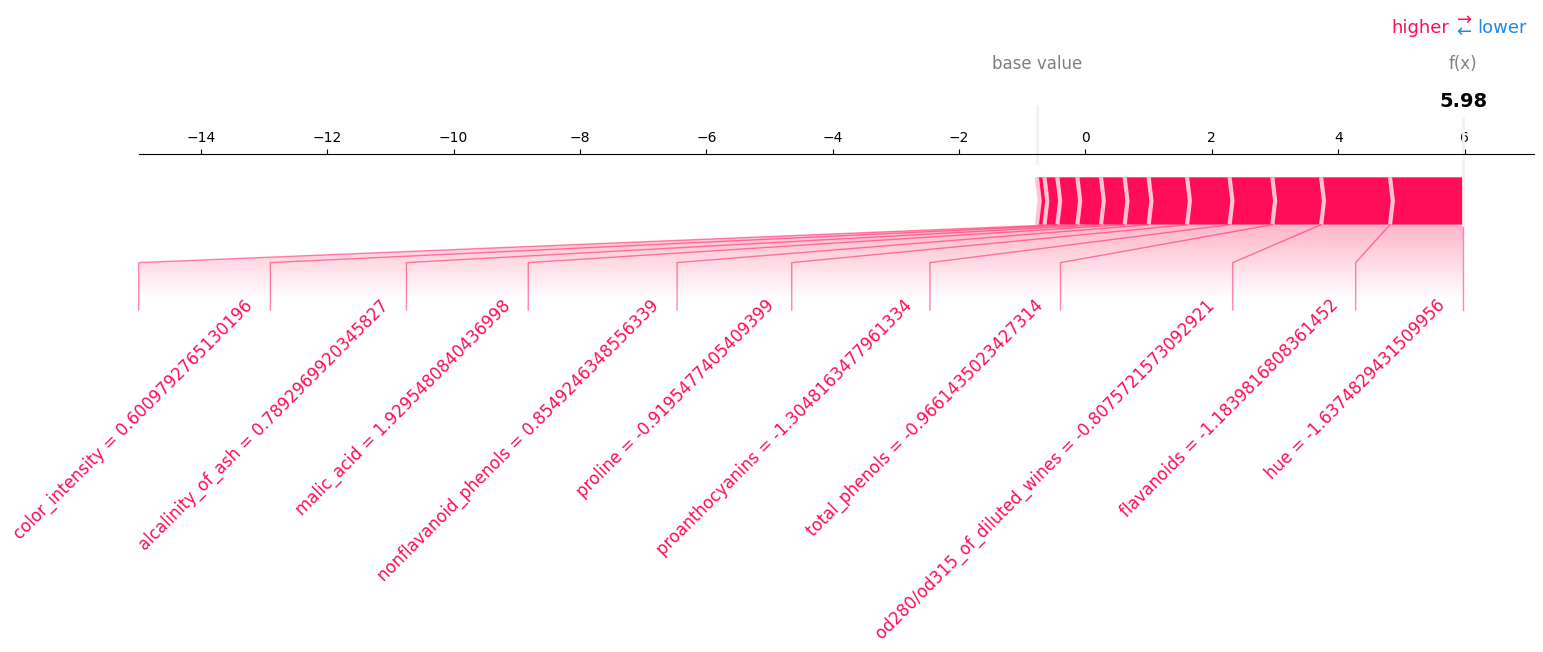

In [67]:
shap.force_plot(explainer.expected_value, shap_values[index],
                X_test_scaled[index], feature_names=feature_names,
                matplotlib=True, figsize=(18, 4), text_rotation=45)

In [68]:
explanation = shap.Explanation(values=shap_values[index],
                               base_values=explainer.expected_value,
                               feature_names=feature_names)

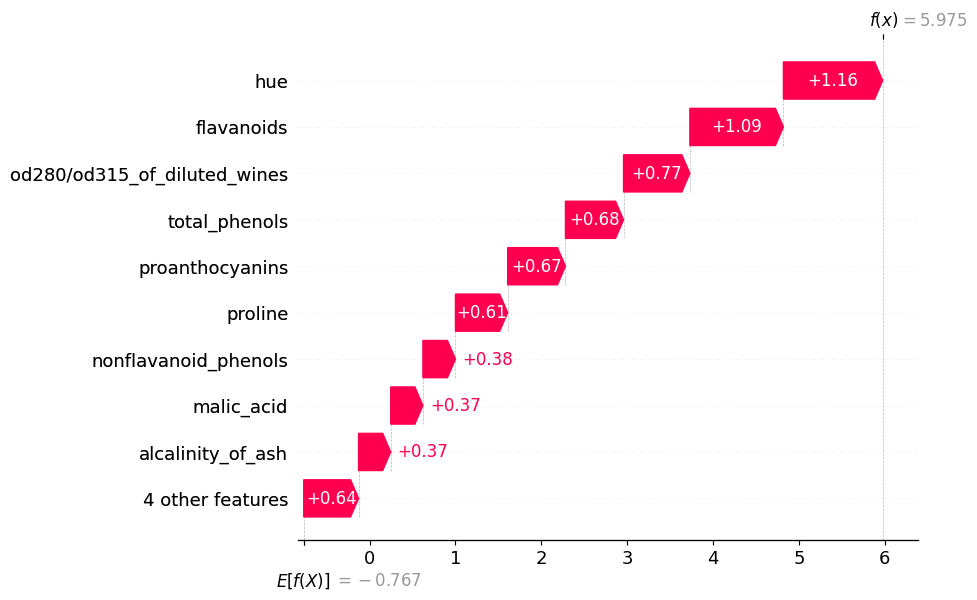

In [69]:
shap.plots.waterfall(explanation)

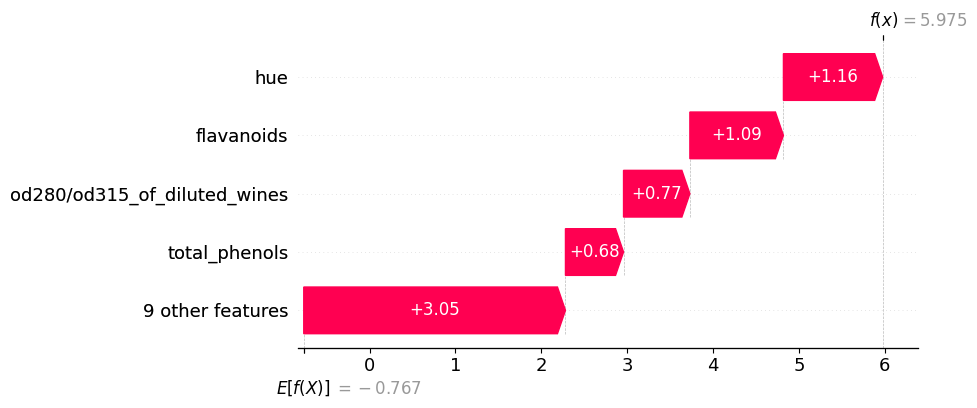

In [70]:
shap.plots.waterfall(explanation, max_display=5)

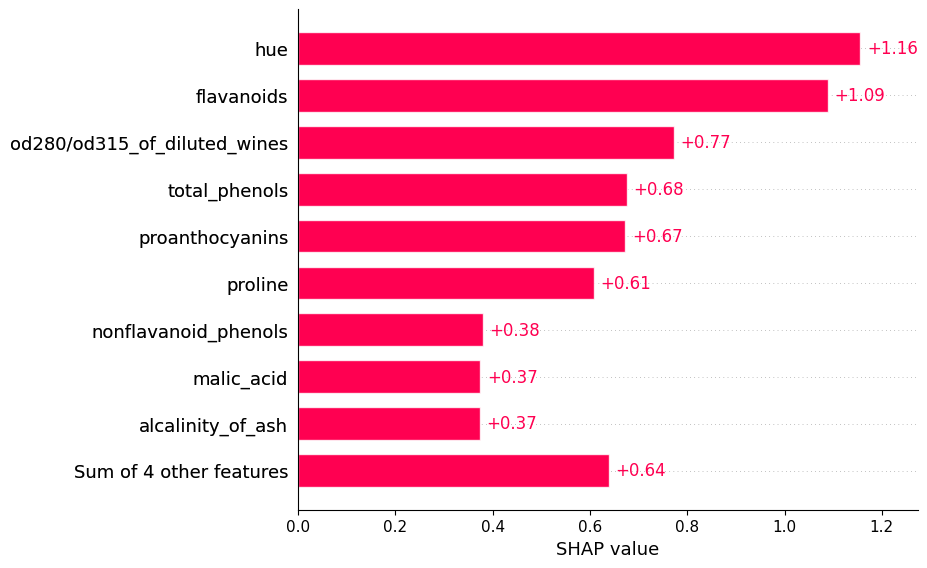

In [71]:
shap.plots.bar(explanation)

## Interpretabilidad **global**

In [72]:
explanation = shap.Explanation(values=shap_values, base_values=explainer.expected_value, feature_names=feature_names, data=X_test)

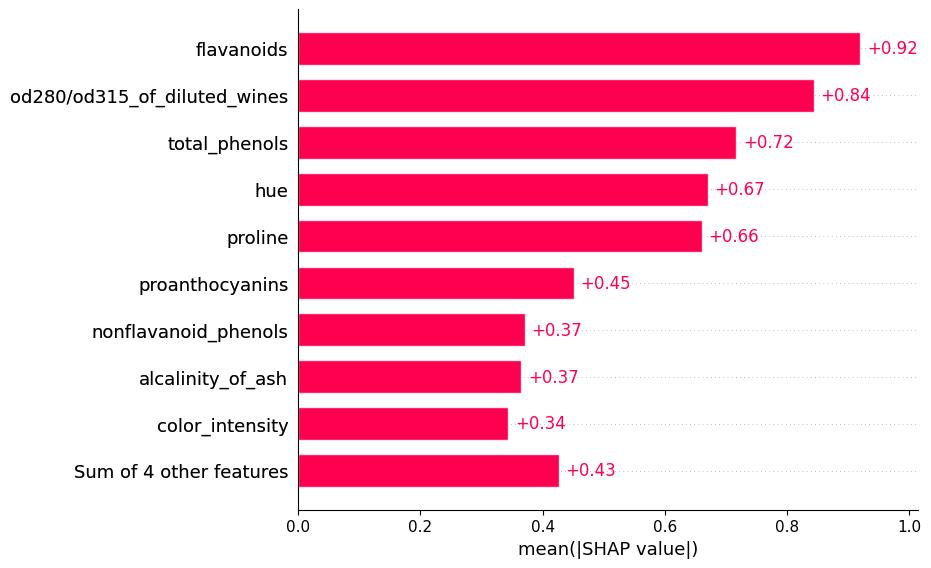

In [74]:
shap.plots.bar(explanation)

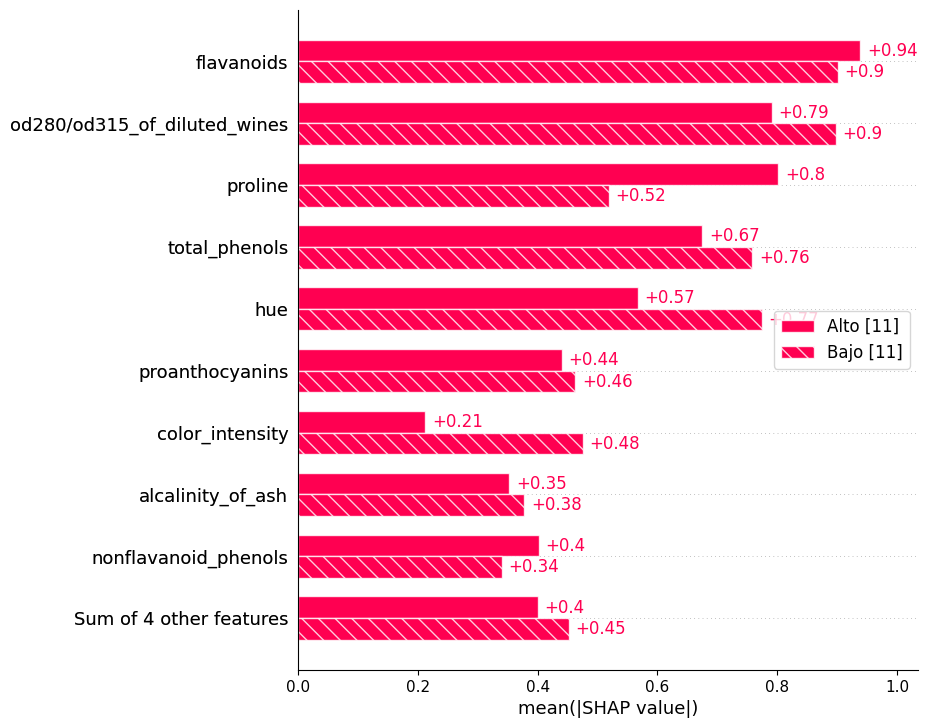

In [75]:
aux = [
    "Bajo" if explanation.data['alcohol'].iloc[i] <= 13.5 else "Alto"
    for i in range(explanation.shape[0])
]
shap.plots.bar(explanation.cohorts(aux).abs.mean(0))

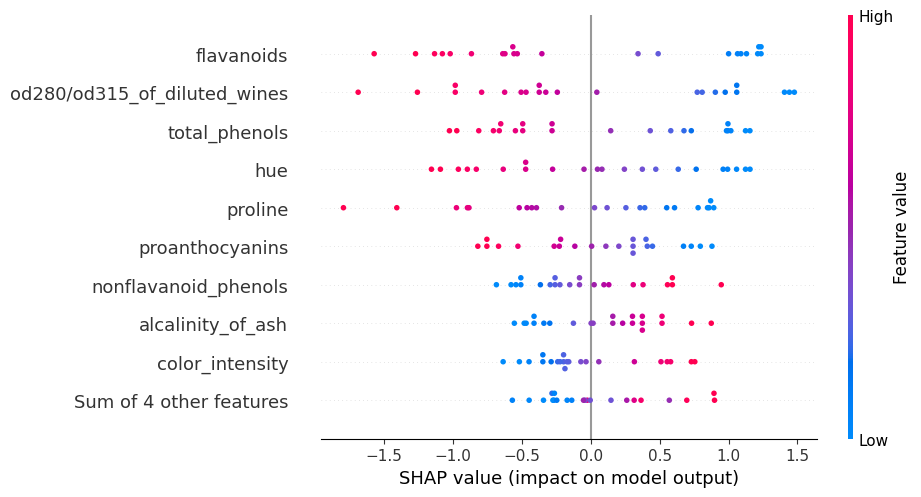

In [76]:
shap.plots.beeswarm(explanation)